In [1]:
# the following line:
# - imports numpy as np
# - imports matplotlib.plt as plt
# - imports such things as nan and int64 into the namespace
# - ensures that plots are inside of Jupyter
# - also makes you coffee in the morning
%pylab inline 
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Series([10, 20, 30, 50, 55, 70, 75, 90])
s

0    10
1    20
2    30
3    50
4    55
5    70
6    75
7    90
dtype: int64

In [3]:
s = Series([10, 20, 30, 50, 55, 70, 75, 90],
          index=list('abcdefgh'))
s

a    10
b    20
c    30
d    50
e    55
f    70
g    75
h    90
dtype: int64

In [4]:
# retrieve via our index with .loc
s.loc['c']

30

In [5]:
# retrieve via position (original/default index) with .iloc
s.iloc[6]

75

In [7]:
s = Series('wow i love to use pandas to work with strings'.split())
s

0        wow
1          i
2       love
3         to
4        use
5     pandas
6         to
7       work
8       with
9    strings
dtype: object

In [8]:
s.str.len()  # ask s (the series) to run the string method len on everyone

0    3
1    1
2    4
3    2
4    3
5    6
6    2
7    4
8    4
9    7
dtype: int64

In [9]:
s

0        wow
1          i
2       love
3         to
4        use
5     pandas
6         to
7       work
8       with
9    strings
dtype: object

In [10]:
for one_element in s:   # never do this -- very slow + inefficient
    print(len(one_element))

3
1
4
2
3
6
2
4
4
7


In [11]:
# (1) Create a series containing 10 words of varying lengths.
s = Series('my very favorite example of a language is python of course'.split())
s

0           my
1         very
2     favorite
3      example
4           of
5            a
6     language
7           is
8       python
9           of
10      course
dtype: object

In [15]:
# (2) Find the words whose length is odd.
s[s.str.len() % 2 == 1]

3    example
5          a
dtype: object

In [19]:
# (3) Find the words whose length is shorter than the mean.

s[s.str.len() < s.str.len().mean()]

0      my
1    very
4      of
5       a
7      is
9      of
dtype: object

In [20]:
s

0           my
1         very
2     favorite
3      example
4           of
5            a
6     language
7           is
8       python
9           of
10      course
dtype: object

In [ ]:
# if indexes match between SERIES and BOOLEAN_SERIES,
# then we will get back a new series based on SERIES
# but only where BOOLEAN_SERIES is True

SERIES[BOOLEAN_SERIES] 

In [28]:
(s == 'example') | (s == 'python')

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

In [24]:
s[(s == 'example') | (s == 'python')]

3    example
8     python
dtype: object

In [27]:
s[s.str.len() > 5]

2     favorite
3      example
6     language
8       python
10      course
dtype: object

In [ ]:
# (4) Find the words (if any) that contain both 'a' and 'e'.

In [30]:
s[s.str.contains('a')]

2    favorite
3     example
5           a
6    language
dtype: object

In [31]:
s[s.str.contains('e')]

1         very
2     favorite
3      example
6     language
10      course
dtype: object

In [32]:
s[(s.str.contains('a')) & (s.str.contains('e'))]

2    favorite
3     example
6    language
dtype: object

In [34]:
# & -- normally for bitwise addition, but used by NumPy/Pandas for "and"
# && -- doesn't exist as an operator in Python at all

5 & 6

4

In [35]:
bin(5)

'0b101'

In [36]:
bin(6)

'0b110'

In [37]:
0b100

4

In [38]:
scores = np.array([95, 90, 92, 100])
scores.mean()

94.25

In [39]:
scores = np.array([95, 90, 92, 100, nan])  # not a number == nan
scores.mean()

nan

In [43]:
# find scores that are NOT nan
scores[~np.isnan(scores)].mean()

94.25

In [44]:
s = Series([95, 90, 92, 100, nan])
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [46]:
s.mean() # Pandas automatically ignores NaN!

94.25

In [47]:
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [48]:
# get rid of NaN values
s.dropna()   # returns a new series, based on s!

0     95.0
1     90.0
2     92.0
3    100.0
dtype: float64

In [49]:
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [50]:
# to really remove NaN from the series, 
# assign back to "s"
s = s.dropna()  

In [51]:
s

0     95.0
1     90.0
2     92.0
3    100.0
dtype: float64

In [52]:
s = Series([95, 90, 92, 100, nan])
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [53]:
s.fillna(999)   # returns a new series with 999 instead of NaN

0     95.0
1     90.0
2     92.0
3    100.0
4    999.0
dtype: float64

In [54]:
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [55]:
# assign it back to s, if I want to make it permanent
s = s.fillna(999)
s

0     95.0
1     90.0
2     92.0
3    100.0
4    999.0
dtype: float64

In [57]:
s = Series([95, 90, 92, 100, nan])
s = s.fillna(s.mean())  # replace NaN with the series mean
s

0     95.00
1     90.00
2     92.00
3    100.00
4     94.25
dtype: float64

In [58]:
s

0     95.00
1     90.00
2     92.00
3    100.00
4     94.25
dtype: float64

In [59]:
s.count()  # how many non-NaN elements?

5

In [60]:
s.min()

90.0

In [61]:
s.max()

100.0

In [62]:
s.mean()

94.25

In [63]:
s.std()

3.766629793329841

In [67]:
# descriptive statistics -- describe our data in a standard way
s.describe() 

count      5.00000
mean      94.25000
std        3.76663
min       90.00000
25%       92.00000
50%       94.25000
75%       95.00000
max      100.00000
dtype: float64

In [65]:
# when I run s.mean(), I'm calculating on the values in 
# s.  I'm asking s to run a method on itself

# when I run s.str.len(), I'm asking the series to run len 
# on each element in s

In [66]:
s.value_counts()   # getting a new series back

94.25     1
100.00    1
92.00     1
90.00     1
95.00     1
dtype: int64

In [69]:
salaries = Series([1000, 1000, 1000, 5000, 5000, 100000])
salaries.mean()

18833.333333333332

In [71]:
salaries.describe()

count         6.000000
mean      18833.333333
std       39811.639839
min        1000.000000
25%        1000.000000
50%        3000.000000
75%        5000.000000
max      100000.000000
dtype: float64

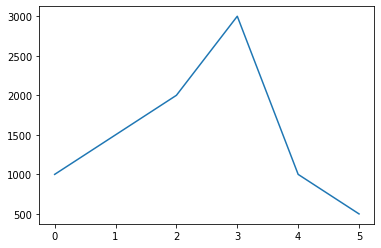

In [72]:
sales = Series([1000, 1500, 2000, 3000, 1000, 500])

# in Pandas in Jupyter with %pylab inline, I can say:
sales.plot.line()  # easier access to / usage of matplotlib

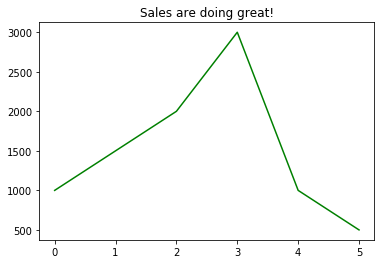

In [74]:
sales.plot.line(title='Sales are doing great!',
               color='green')

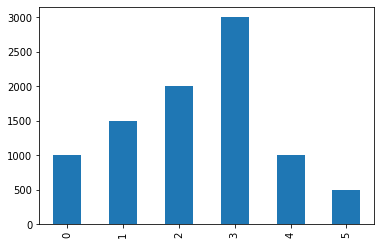

In [75]:
# line plot
# bar plot

sales.plot.bar()

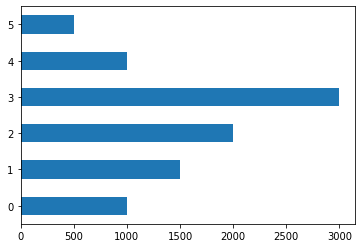

In [76]:
# horizontal bar plot
sales.plot.barh()

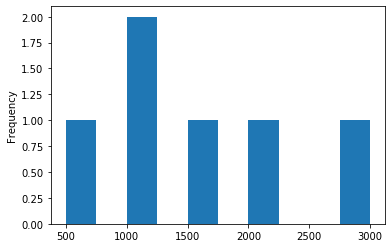

In [77]:
# histogram
sales.plot.hist()

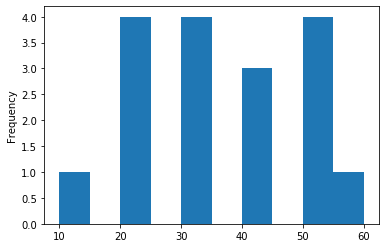

In [78]:
s = Series([10, 20, 30, 20, 30, 40, 20, 30, 40, 50, 20, 30, 40, 50, 60, 50, 50])
s.plot.hist()

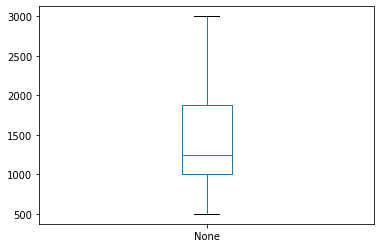

In [79]:
# boxplots (aka box-and-whisker plots)
# John Tewkey -- prof at Princeton 
# he invented the idea of "descriptive statistics"

sales.plot.box()

In [80]:
s

0     10
1     20
2     30
3     20
4     30
5     40
6     20
7     30
8     40
9     50
10    20
11    30
12    40
13    50
14    60
15    50
16    50
dtype: int64

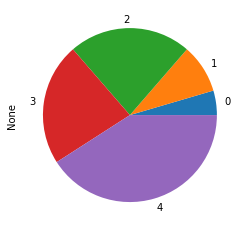

In [81]:
s = Series([10, 20, 50, 50, 90])
# pie plot -- take all values, and sum them
# give each value a pie piece relative to its size

s.plot.pie()

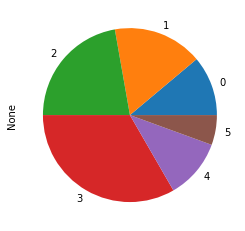

In [82]:
sales.plot.pie()

In [84]:
sales

0    1000
1    1500
2    2000
3    3000
4    1000
5     500
dtype: int64

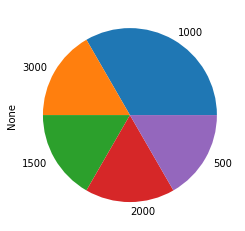

In [86]:
# value_counts + pie plot == show how relative frequency

# what was the most common sales figure in a month?
sales.value_counts().plot.pie()

In [87]:
s = Series([10, 30, 50, 20, 90, 100, 1000, 200])
s.describe()

count       8.000000
mean      187.500000
std       333.969631
min        10.000000
25%        27.500000
50%        70.000000
75%       125.000000
max      1000.000000
dtype: float64

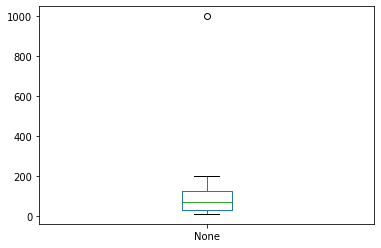

In [88]:
s.plot.box()

In [89]:
s = Series([10, 30, 50, 20, 90, 100, 200])
s.describe()

count      7.000000
mean      71.428571
std       66.188763
min       10.000000
25%       25.000000
50%       50.000000
75%       95.000000
max      200.000000
dtype: float64

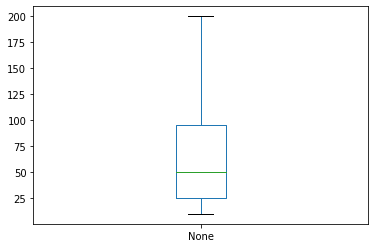

In [90]:
s.plot.box()

In [91]:
# (1) Get the weather report for your city over the coming week,
#     and create a series with those
#     temperatures.  The index should contain the days' names.

s = Series([20, 22, 27, 20, 19, 21, 25, 22],
           index='Tue Wed Thu Fri Sat Sun Mon Tue'.split())
s

Tue    20
Wed    22
Thu    27
Fri    20
Sat    19
Sun    21
Mon    25
Tue    22
dtype: int64

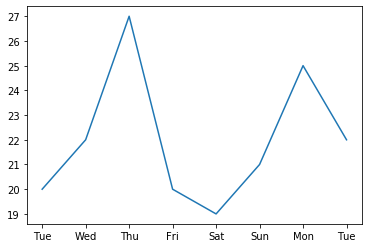

In [92]:
# (2) Create a line plot with the temperatures.
s.plot.line()

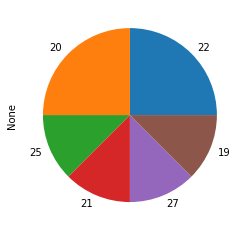

In [95]:
# (3) Create a pie plot, showing how often each temperature is
#     forecast in the coming week. 

s.value_counts().plot.pie()

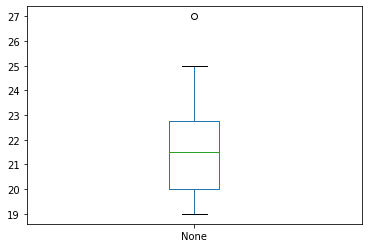

In [96]:
# (4) Create a box plot with the temperatures.  What are the 
#      maximum, minimum, and median temperatures for the coming
#      week?

s.plot.box()

In [97]:
s.describe()

count     8.000000
mean     22.000000
std       2.725541
min      19.000000
25%      20.000000
50%      21.500000
75%      22.750000
max      27.000000
dtype: float64

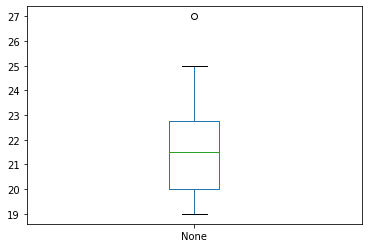

In [98]:
# To export a plot:
# (1) Create the plot, and save the object to a variable
# (2) Get the "figure" from the plot object
# (3) Save the figure to the filesystem

plot = s.plot.box()

In [101]:
fig = plot.get_figure() 

In [102]:
fig.savefig('myplot.png')

In [103]:
fig.savefig('myplot.jpeg')

In [104]:
%ls myplot*

myplot.jpeg  myplot.png


In [105]:
!open myplot.png

In [106]:
s = Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [107]:
df = DataFrame([[10, 20, 30], 
               [40, 50, 60], 
               [70, 80,90],
               [100, 110, 120]])
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90
3,100,110,120


In [108]:
df.values

array([[ 10,  20,  30],
       [ 40,  50,  60],
       [ 70,  80,  90],
       [100, 110, 120]])

In [110]:
df = DataFrame(np.arange(10, 121, 10).reshape(4, 3))
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90
3,100,110,120


In [111]:
# every column in a DataFrame is a Pandas Series!

In [112]:
# retrieve from row index 1
df.loc[1]

0    40
1    50
2    60
Name: 1, dtype: int64

In [113]:
df.loc[[1, 3]]

,0,1,2
1,40,50,60
3,100,110,120


In [114]:
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90
3,100,110,120


In [115]:
df.loc[1, 1]  # get row 1, column 1

50

In [116]:
df.loc[1, 2]  # get row 1, column 2

60

In [119]:
df.loc[1, [1,2]]  # row 1, columns 1+2

1    50
2    60
Name: 1, dtype: int64

In [120]:
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90
3,100,110,120


In [121]:
# retrieve column index 1
# in a series, s[n] retrieves element at index n from s
# in a data frame, df[n] retrieves column n from df
# if you always use .loc and .iloc for index, you won't have trouble
df[1]  

0     20
1     50
2     80
3    110
Name: 1, dtype: int64

In [122]:
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90
3,100,110,120


In [125]:
df = DataFrame(np.arange(10, 121, 10).reshape(4, 3),
              index=list('abcd'),
              columns=list('xyz'))
df

,x,y,z
a,10,20,30
b,40,50,60
c,70,80,90
d,100,110,120


In [126]:
df.loc['c']

x    70
y    80
z    90
Name: c, dtype: int64

In [127]:
df.iloc[2]

x    70
y    80
z    90
Name: c, dtype: int64

In [128]:
df['y']

a     20
b     50
c     80
d    110
Name: y, dtype: int64

In [129]:
df

,x,y,z
a,10,20,30
b,40,50,60
c,70,80,90
d,100,110,120


In [130]:
df.loc['b', 'z'] = 999
df

,x,y,z
a,10,20,30
b,40,50,999
c,70,80,90
d,100,110,120


In [131]:
# not recommended!
# (1) less efficient -- two method calls
# (2) it might not work!
df.loc['b']['y'] = 888

In [132]:
df

,x,y,z
a,10,20,30
b,40,888,999
c,70,80,90
d,100,110,120


In [133]:
df = DataFrame(np.arange(10, 121, 10).reshape(4, 3),
              index=list('abcdefg'),
              columns=list('xyz'))
df

ValueError: Shape of passed values is (4, 3), indices imply (7, 3)

In [134]:
df

,x,y,z
a,10,20,30
b,40,888,999
c,70,80,90
d,100,110,120


In [135]:
a = np.array([10, 20, 30])
a[1] = 123.456
a

array([ 10, 123,  30])

In [136]:
df.loc['a', 'y'] = 123.456
df

,x,y,z
a,10,123.456,30
b,40,888.000,999
c,70,80.000,90
d,100,110.000,120


In [138]:
df.dtypes

x      int64
y    float64
z      int64
dtype: object

In [139]:
df.loc['a']

x     10.000
y    123.456
z     30.000
Name: a, dtype: float64

In [140]:
df

,x,y,z
a,10,123.456,30
b,40,888.000,999
c,70,80.000,90
d,100,110.000,120


In [ ]:
# (1) Create a 5x5 data frame in which the rows are "abcde" and the
#     columns are "vwxyz", and the values are random integers from
#     0-1,000.

# (2) Retrieve row 'b'

# (3) Retrieve rows 'b' and 'd'

# (4) Retrieve rows 'b', 'c', and 'd'

# (5) Retrieve column 'w'

# (6) Retrieve columns 'w' and 'y'

# (7) Retrieve columns 'w', 'x', and 'y'

# (8) Retrieve the item at row e, column v

# (9) Update the item at row e, column z to be 123.456

# (10) Create a data frame with two columns: 'age' and 'shoesize'.  Each
#     row will represent a different person in your family.  And indeed,
#     create the data frame such that the indexes are the names of your
#     family members, and the "age" and "shoesize" columns are the right
#     values.  Create this in two ways: Using a list of dicts, adn a
#     dict of lists.

# (11) What is the average age in your family?  What is the average shoe size?
